# EDA & Data Preprocessing on Google App Store Rating Dataset

The Goal is to explore the data and pre-process it for future use in any predictive analytics study

1. Import required libraries and read the dataset

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\FCI-1626\Downloads\Apps_data+(1).csv")

In [4]:
df_copy=df.copy()

In [5]:
#2. Check the first few samples, shape, info of the data and try 
#to familiarize yourself with different features

In [6]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [7]:
df.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [8]:
df.shape

(10841, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [11]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

3. Check summary statistics of the dataset. List out the columns that need to
be worked upon for model building.

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [14]:
#we can change the data type of the column reviews
#remove the unwanted characters from the columns prize,size and installs
#encode the column content rating

4. Check if there are any duplicate records in the dataset? if any drop them.

In [15]:
dupes=df.duplicated()
sum(dupes)

483

In [16]:
df=df.drop_duplicates()

In [17]:
dupes=df.duplicated()
sum(dupes)

0

5. Check the unique categories of the column 'Category', Is there any invalid category? 
If yes, drop them.

In [19]:
df_unique=df['Category'].unique()

In [20]:
df_unique

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [21]:
invalid_category=['1.9']

In [22]:
df = df[~df['Category'].isin(invalid_category)]

6. Check if there are missing values present in the column Rating, If any?
drop them and and create a newcolumn as 'Rating_category' by converting ratings to high and low 
categories(>3.5 is high rest low)


In [24]:
df['Rating'].isnull().sum()

1465

In [25]:
#drop the missing values
df=df.dropna(subset=['Rating'])

In [26]:
#added new column
df["Rating_Category"]=df["Rating"].apply(lambda x:'high' if x>3.5 else 'low')

7. Check the distribution of the newly created column 'Rating_category' and
comment on the distribution.

In [28]:
df.Rating_Category.value_counts()

Rating_Category
high    8012
low      880
Name: count, dtype: int64

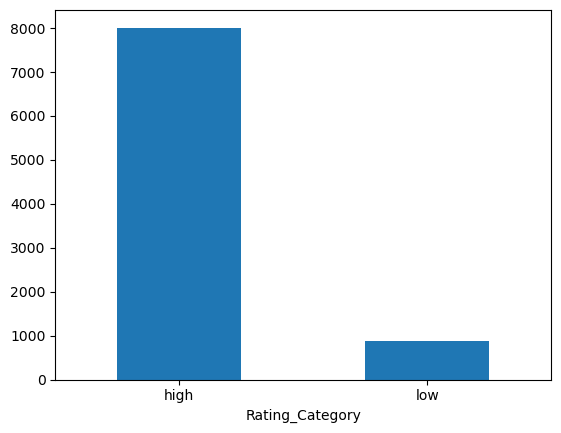

In [29]:
df.Rating_Category.value_counts().plot(kind='bar',rot=0)
plt.show()

In [30]:
#majority of ratings are high,suggesting that a large proportion of the ratings are above 3.5 
#The 'Low' category has fewer ratings, indicating that a smaller proportion of the ratings fall
#below 3.5.
#The distribution is imbalanced, as there is a substantial difference in the number of ratings
#between the 'High' and 'Low' categories.

8. Convert the column "Reviews" to numeric data type and check the presence of outliers in 
the column and handle the outliers using a transformation approach.(Hint: Use log transformation

In [32]:
df["Reviews"]=df["Reviews"].astype(int)

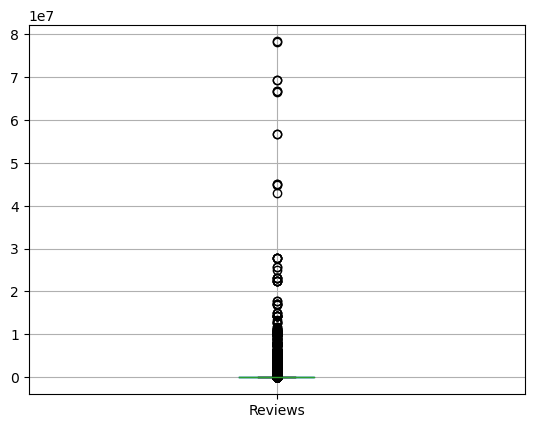

In [33]:
boxplot=df.boxplot(column="Reviews")
plt.show()

In [34]:
Q1=df.Reviews.quantile(0.25)
Q3=df.Reviews.quantile(0.75)
IQR=Q3-Q1

In [35]:
upper_limit=Q3+(1.5*IQR)
lower_limit=Q1-(1.5*IQR)

In [36]:
lower_array=np.where(df['Reviews']>=upper_limit)[0]
upper_array=np.where(df['Reviews']<=lower_limit)[0]

In [37]:
#log transformation
from sklearn.preprocessing import FunctionTransformer
log_transformer=FunctionTransformer(np.log1p)

In [38]:
df['Reviews']=log_transformer.fit_transform(df[['Reviews']])

9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the
column into suitable data type.


In [40]:
df['Size']=df['Size'].str.replace('M','e6').str.replace('k','e3')

In [41]:
df = df[df['Size'] != 'Varies with device']


In [42]:
df['Size']=df['Size'].astype(float)

10. Check the column 'Installs', treat the unwanted characters and convert the column into a 
suitable data type.


In [44]:
df['Installs']=df['Installs'].str.replace(',','').str.replace('+','').astype(int)

11. Check the column 'Price' , remove the unwanted characters and 
convert the column into a suitable data type.

In [46]:
df['Price']=df['Price'].str.replace('$','').astype(float)

12. Drop the columns which you think redundant for the analysis

In [47]:
#drop column 'rating', since we created a new feature from it (i.e. rating_category) 
#and the columns 'App', 'Rating' ,'Genres','Last Updated','Current Ver','Android Ver' columns
#since which are redundant for our analysis)

In [48]:
df=df.drop(['Rating','App','Genres','Last Updated','Current Ver','Android Ver'],
           axis=1)

In [49]:
df.columns

Index(['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Rating_Category'],
      dtype='object')

13. Encode the categorical columns.


In [51]:
#label encode the column 'Rating Category'
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [52]:
df['Rating_category_new']=label_encoder.fit_transform(df['Rating_Category'])

In [53]:
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_Category,Rating_category_new
0,ART_AND_DESIGN,5.075174,19000000.0,10000,Free,0.0,Everyone,high,0
1,ART_AND_DESIGN,6.875232,14000000.0,500000,Free,0.0,Everyone,high,0
2,ART_AND_DESIGN,11.379520,8700000.0,5000000,Free,0.0,Everyone,high,0
3,ART_AND_DESIGN,12.281389,25000000.0,50000000,Free,0.0,Teen,high,0
4,ART_AND_DESIGN,6.875232,2800000.0,100000,Free,0.0,Everyone,high,0


In [54]:
#one_hot encode the columns 'type' and 'content rating'

In [55]:
df=pd.get_dummies(df,columns=['Type','Content Rating'],dtype=int)

In [57]:
df=df.drop(['Category','Rating_Category'],axis=1)

14. Segregate the target and independent features (Hint: Use Rating_category as the target

In [63]:
#drop independent features into x dataframe
x=df.drop("Rating_category_new",axis=1)

In [64]:
#copy the target variable column alone into y dataframe
y=df[["Rating_category_new"]]

15. Split the dataset into train and test

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

16. Standardize the data, so that the values are within a particular range.

In [69]:
from sklearn.preprocessing import StandardScaler
std_scale=StandardScaler()

In [71]:
x_train_scaler=std_scale.fit_transform(x_train)
x_test_scaler=std_scale.fit_transform(x_test)
y_train_scaler=std_scale.fit_transform(y_train)
y_test_scaler=std_scale.fit_transform(y_test)

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\FCI-1626\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [76]:
y_predict=model.predict(x_test)

In [77]:
model.score(x_test,y_test)

0.8900359066427289

In [78]:
model.score(x_train,y_train)

0.8883756735950731